<b><u><center>HOMEWORK 4A IRIS Data Set</center></u></b>

<b>Dimesntionality Reduction Methods</b>

In [29]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import FastICA

def tsne(X):
    tsne = TSNE(n_components=2,init='random',perplexity=57)
    X_tsne = tsne.fit_transform(X)
    return X_tsne


def normalize(X):
    transform=Normalizer()
    X_tsne=transform.transform(X)
    return X_tsne

def pca(X):
    pca = PCA(n_components=2)
    X_tsne= pca.fit_transform(X)
    return X_tsne

def feature_selection(X):
    X_new = SelectKBest(mutual_info_regression, k=10).fit_transform(X)
    return X_new

def apply_svd(X):
    svd = TruncatedSVD(n_components=2)
    X_svd = svd.fit_transform(X)
    return X_svd


def ica(X):
    ica = FastICA(n_components=10)
    X_ica = ica.fit_transform(X)
    return X_ica

def randomProjection(X):
    rp = GaussianRandomProjection(n_components=10)
    X_rp = rp.fit_transform(X)
    return X_rp

def autoEncoder(X):
    ae = MLPRegressor(hidden_layer_sizes=(100, 50, 100), activation='relu', solver='adam')
    ae.fit(X, X)
    X_ae = ae.predict(X)
    return X_ae

<b>K MEANS Implmentation</b> 

In [172]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import random
from scipy.spatial.distance import cdist


class KMeansImp():
    def __init__(self, X_Data, K_Clusters, F):
        self.K_Clusters = K_Clusters
        self.X_Data = X_Data
        self.Y = None
        self.errorValue =[]
        self.distValue = np.zeros((X_Data.shape[0], K_Clusters))
        self.Centroid = random.sample(list(self.X_Data), self.K_Clusters)
        self.features = F
 
    def centroids(self):      
        CentroidList = np.zeros((self.K_Clusters, self.features))
        for i in range(self.K_Clusters):
            if(i==0):
                CentroidList[0] = self.X_Data[np.random.choice(self.X_Data.shape[0],1)]
            CentroidList[i] = self.X_Data[self.Y == i].mean(axis = 0)

        if np.array_equal(self.Centroid, CentroidList):
            return True;   

        self.Centroid = np.asarray(CentroidList)
            return False; 
    
    def distances(self):
        self.distValue =cdist(self.X_Data, self.Centroid, 'euclidean')# euclidean_distances(self.X_Data,self.Centroid)

    def clusters(self):
        self.Y = np.argmin(self.distValue, axis = 1)

    def inertia(self):
        self.errorValue.append(np.sum(np.min(cdist(self.X_Data, self.Centroid, 'euclidean'), axis=1)**2))
                          
    def Main(self, itr):
        for i in range(itr):
            self.distances()
            self.clusters()
            breakingCondt=self.centroids()
            if(breakingCondt):
                #print('Breaking at:',itr)
                break
            self.inertia()
        
        return self.Centroid, self.errorValue, self.Y

def increment_y(y_test_self_kmeans):
    for i in range(len(y_test_self_kmeans)):
        y_test_self_kmeans[i] += 1
    return y_test_self_kmeans

<b>Importing Data and Visualizing </b> 

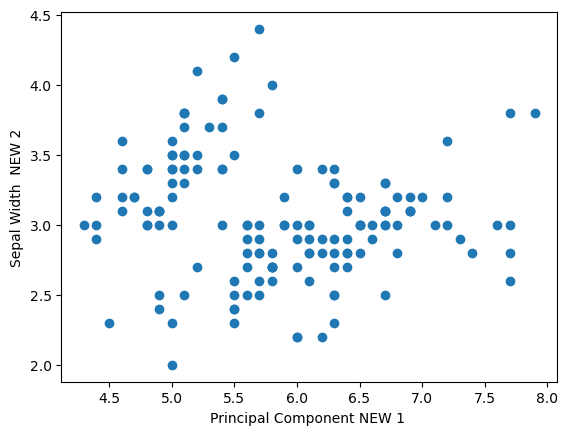

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Import the Dataset
iris_test = pd.read_csv("iris_test.txt",delimiter=" ", header=None)

plt.scatter(iris_test.iloc[:, 0], iris_test.iloc[:, 1])
plt.xlabel('Principal Component NEW 1 ')
plt.ylabel('Sepal Width  NEW 2')
plt.show()

<b>Applying Normalization</b> 

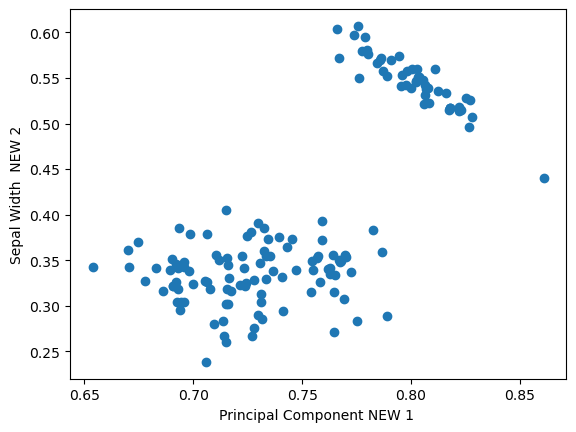

In [178]:
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


X_test_tsne=normalize(iris_test)

plt.scatter( X_test_tsne[:, 0], X_test_tsne[:, 1])
plt.xlabel( 'Principal Component NEW 1 ')
plt.ylabel( 'Sepal Width  NEW 2')
plt.show()

<b>Gathering Evaluation Metrics</b> 

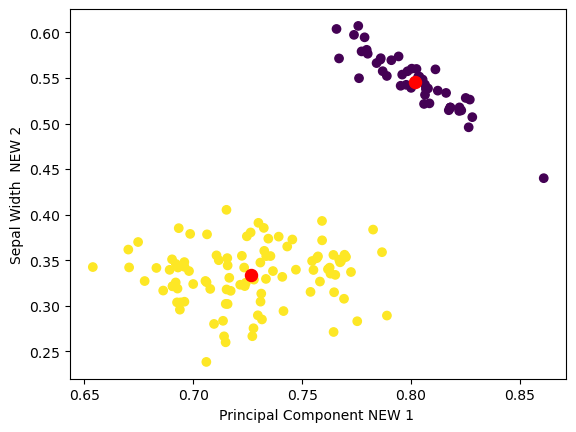

K = 2   Score is: 0.818857077290048


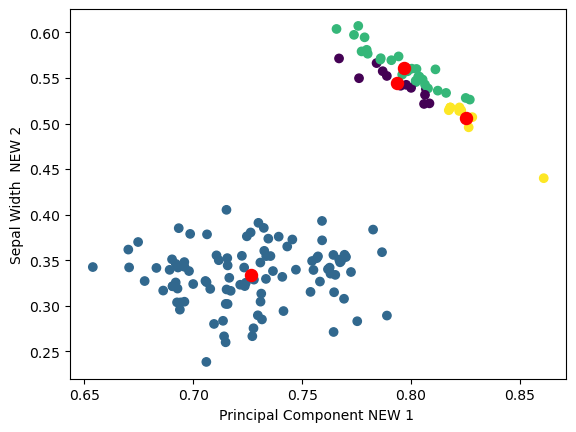

K = 4   Score is: 0.6120145815590144


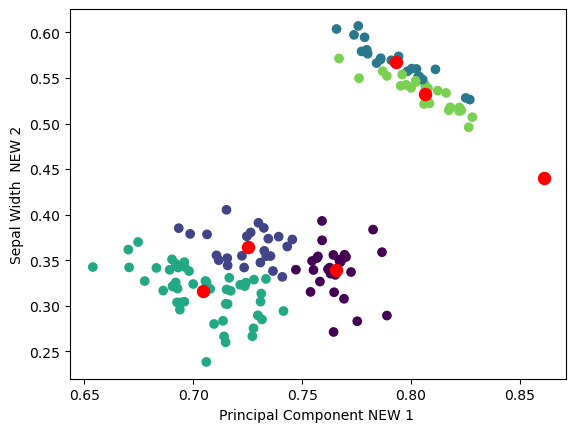

K = 6   Score is: 0.31015687391383395


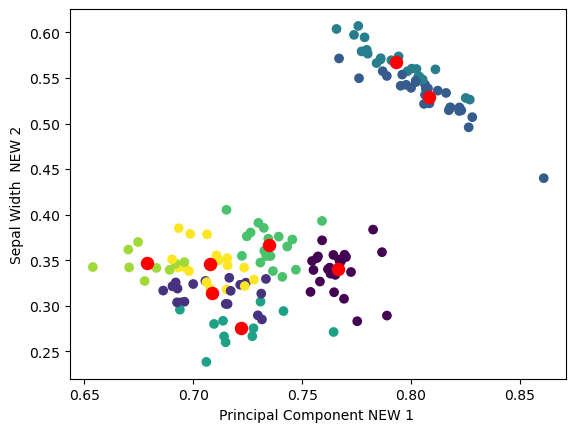

K = 8   Score is: 0.2812757152708433


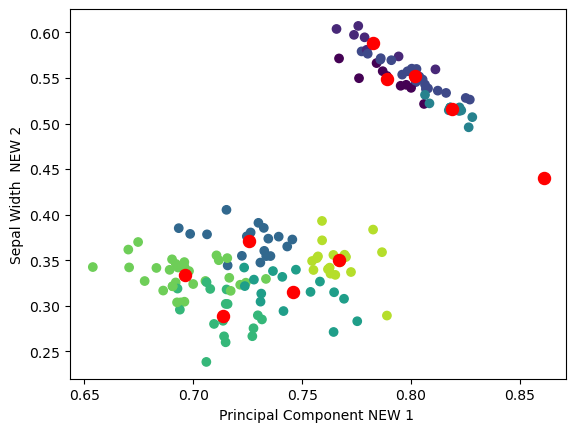

K = 10   Score is: 0.2996862619852767


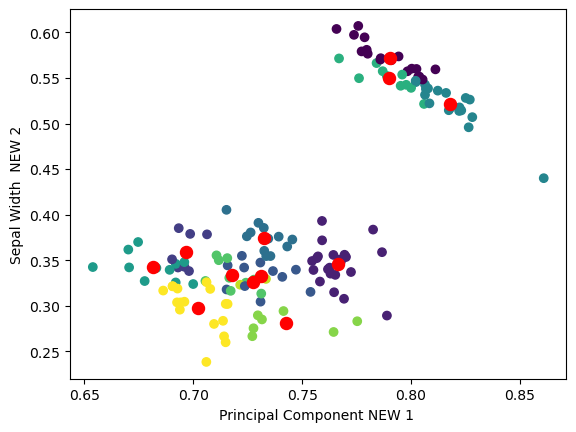

K = 12   Score is: 0.26395219318450264


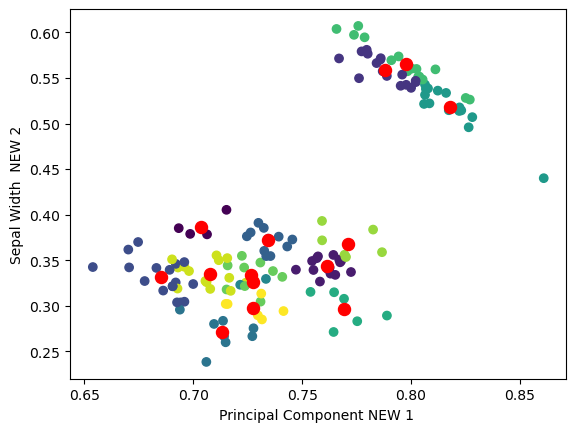

K = 14   Score is: 0.26786124777436676


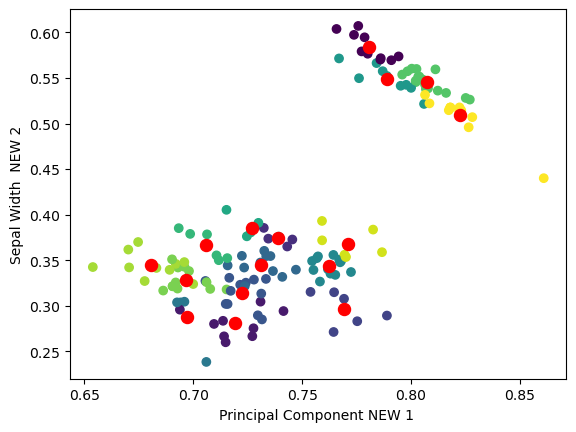

K = 16   Score is: 0.2824991918388068


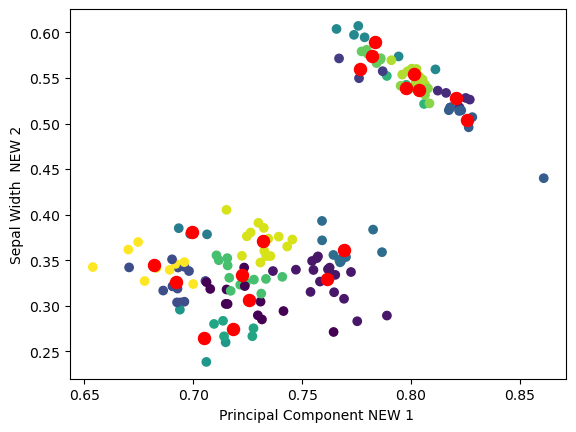

K = 18   Score is: 0.2528018877371268


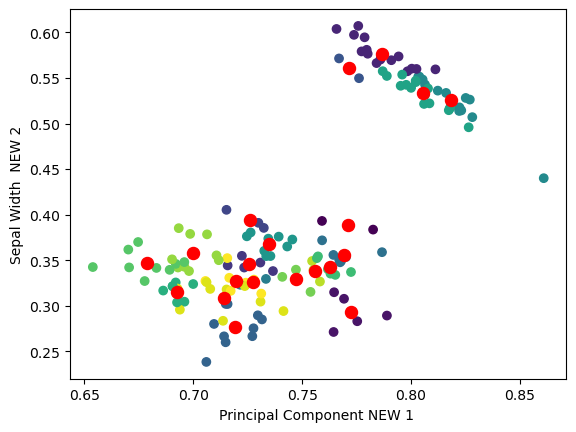

K = 20   Score is: 0.23638747095275353


In [140]:
from sklearn.metrics import silhouette_score

iris_scores=[]
for i in range (2,21,2):
    k1= KMeansImp(X_test_tsne, i, X_test_tsne.shape[1])
    centroid_test, errorValued, y_test_self_kmeans= k1.Main(400)
    y_predicted_test = increment_y( y_test_self_kmeans )
    plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c= y_predicted_test, cmap = 'viridis')
    plt.scatter(centroid_test[:, 0], centroid_test[:, 1], marker='.', s=300, c='red')
    plt.xlabel('Principal Component NEW 1 ')
    plt.ylabel('Sepal Width  NEW 2')
    plt.show()
    iris_score = silhouette_score(X_test_tsne, y_predicted_test)
    print('K =',i,'  Score is:',iris_score)
    iris_scores.append(iris_score)

<b>K Means without Normalization</b>

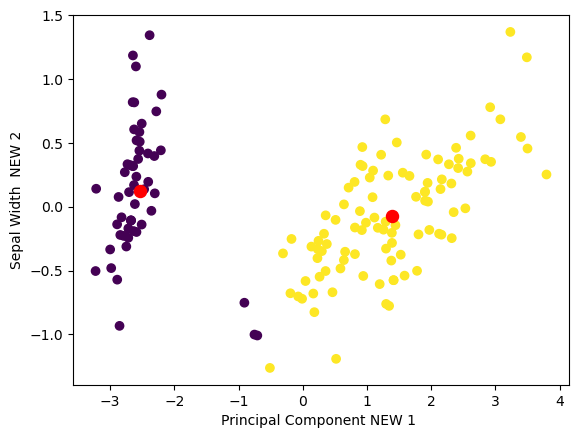

K = 2   Score is: 0.7055088264308357


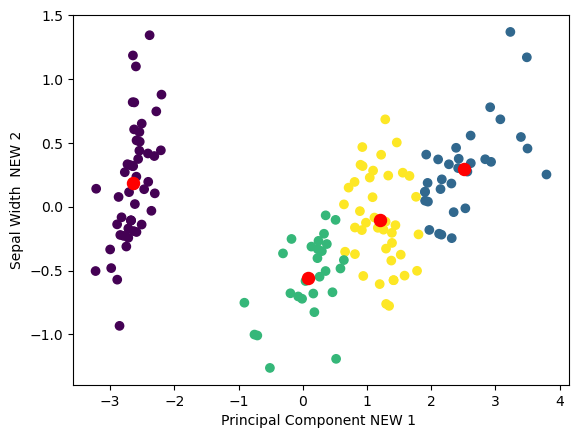

K = 4   Score is: 0.5609038404879186


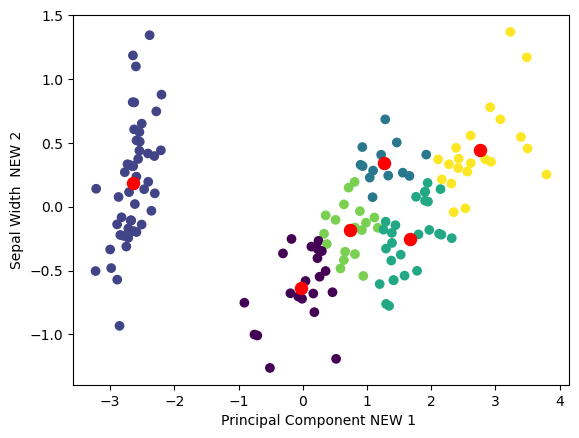

K = 6   Score is: 0.4829173047231174


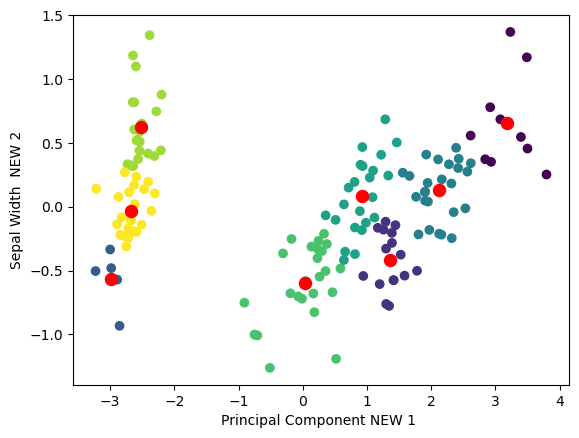

K = 8   Score is: 0.41086524336617053


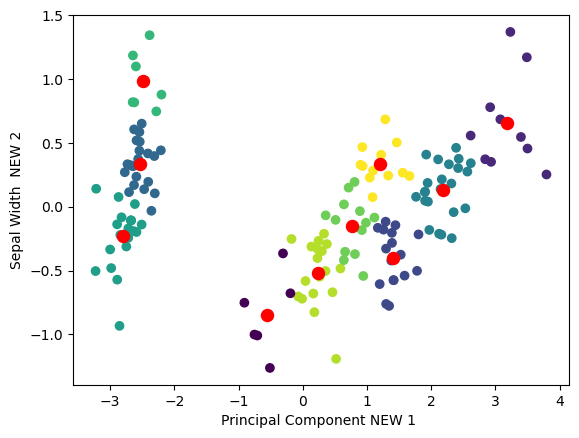

K = 10   Score is: 0.4140231462712295


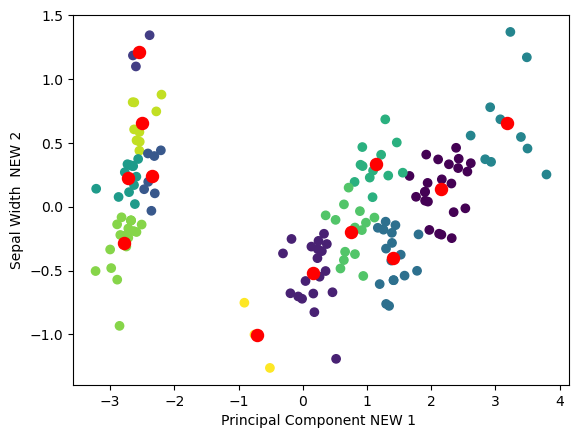

K = 12   Score is: 0.40705857506337667


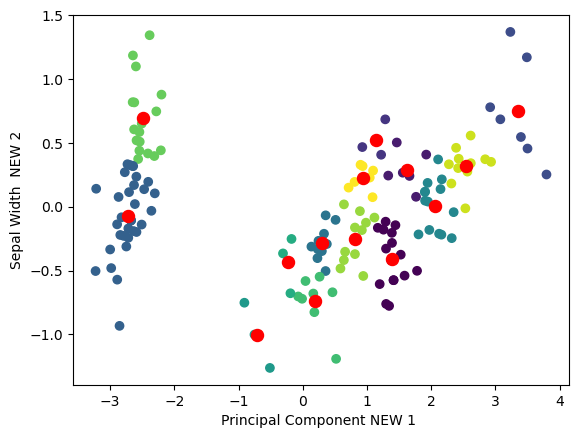

K = 14   Score is: 0.3779613820115087


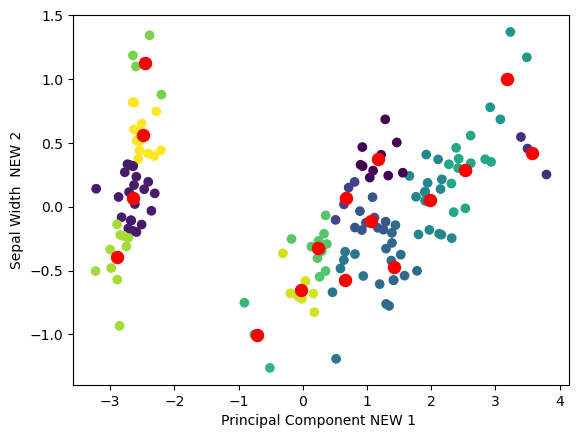

K = 16   Score is: 0.35135306695808516


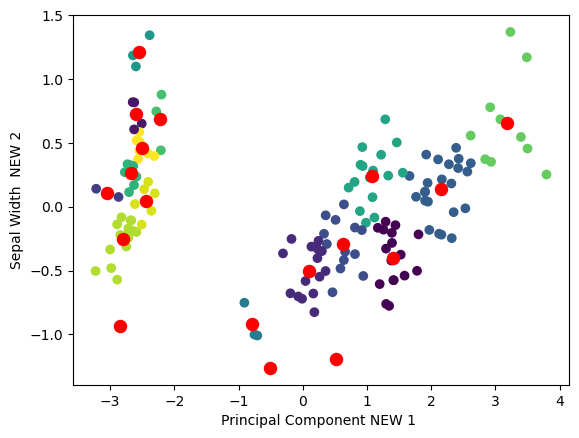

K = 18   Score is: 0.3666914666803637


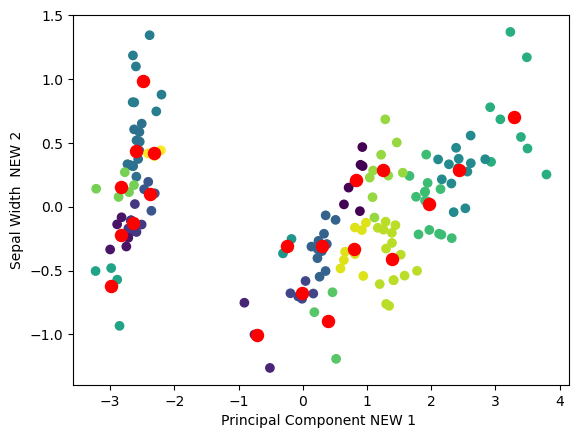

K = 20   Score is: 0.3504648256543221


In [101]:
from sklearn.metrics import silhouette_score

iris_test = pca(iris_test)

scores=[]
for i in range (2,21,2):
    k2= KMeansImp(iris_test, i, iris_test.shape[1])
    centroids, errorValues, y_test= k2.Main(400)
    y_predicted = increment_y( y_test )
    plt.scatter(iris_test[:, 0], iris_test[:, 1], c= y_test, cmap = 'viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=300, c='red')
    plt.xlabel('Principal Component NEW 1 ')
    plt.ylabel('Sepal Width  NEW 2')
    plt.show()
    score = silhouette_score(iris_test, y_test)
    print('K =',i,'  Score is:',score)
    scores.append(score)

<b>Running for 3 clusters</b> 

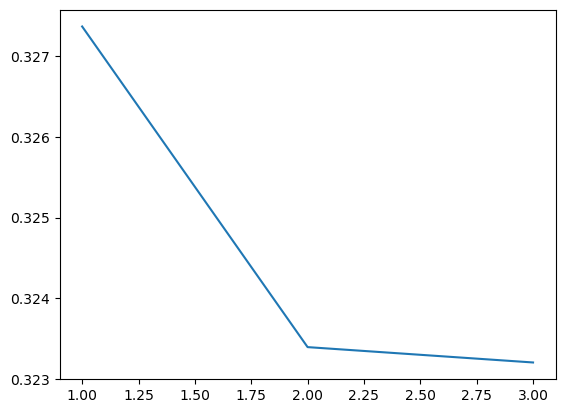

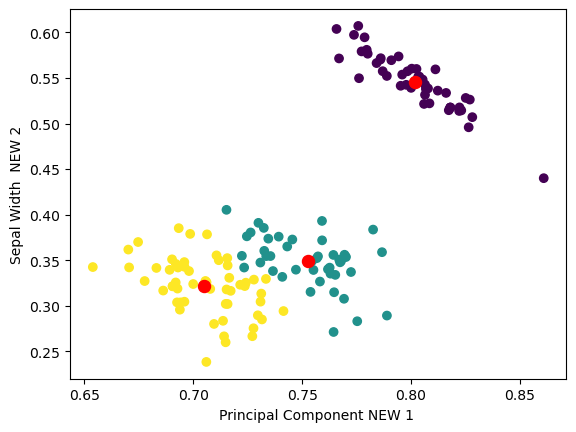

K = 3   Score is: 0.576148277838939


In [174]:
from sklearn.metrics import silhouette_score

k= KMeansImp(X_test_tsne, 3, X_test_tsne.shape[1])
centroid_test, errorValued, Y_test = k.Main(150)
cluster=[1,2,3]
plt.plot(cluster, errorValued)
plt.show()
Y_test = increment_y(Y_test )
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c= Y_test, cmap = 'viridis')
plt.scatter(centroid_test[:, 0], centroid_test[:, 1], marker='.', s=300, c='red')
plt.xlabel('Principal Component NEW 1 ')
plt.ylabel('Sepal Width  NEW 2')
plt.show()
iris_s = silhouette_score(X_test_tsne, Y_test)
print('K =',3,'  Score is:',iris_s)

<b>Evaluation File</b> 

In [504]:
file = open("Deep_Vora__Output_Iris_FINAL_Test.txt", "w") 

for i, item in enumerate(Y_test):
    file.write(str(item) + "\n")

file.close()

<b>Plotting Evaluation Metrics</b> 

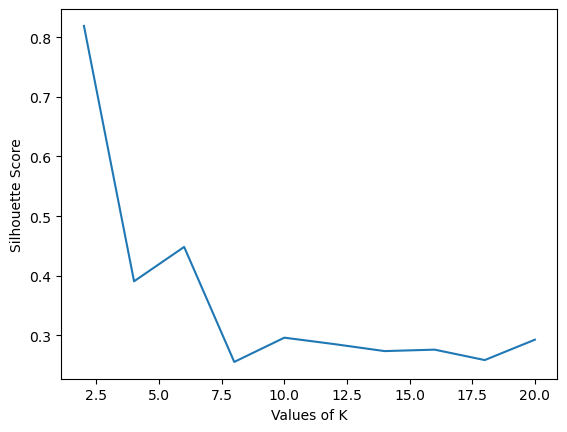

In [505]:
import matplotlib.pyplot as plt

clusters=[2,4,6,8,10,12,14,16,18,20]
plt.plot( clusters,iris_scores)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.show()